# Housing Agency 

In [26]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
data = pd.read_csv(url)

# Task 1: Become familiar with the dataset

In [12]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV           AGE_group  
0  296.0     15.3   4.98  24.0      35 to 70 years  
1  242.0     17.8   9.14  21.6  70 years and older  
2  242.0     17.8   4.03  34.7      35 to 70 years  
3  222.0     18.7   2.94  33.4      35 to 70 years  
4  222.0     18.7   5.33  36.2      35 to 70 years  


In [13]:
# Display information about the dataset
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  506 non-null    int64   
 1   CRIM        506 non-null    float64 
 2   ZN          506 non-null    float64 
 3   INDUS       506 non-null    float64 
 4   CHAS        506 non-null    float64 
 5   NOX         506 non-null    float64 
 6   RM          506 non-null    float64 
 7   AGE         506 non-null    float64 
 8   DIS         506 non-null    float64 
 9   RAD         506 non-null    float64 
 10  TAX         506 non-null    float64 
 11  PTRATIO     506 non-null    float64 
 12  LSTAT       506 non-null    float64 
 13  MEDV        506 non-null    float64 
 14  AGE_group   506 non-null    category
dtypes: category(1), float64(13), int64(1)
memory usage: 56.1 KB
None


In [14]:
# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(data.describe())


Basic statistics of the dataset:
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455

In [16]:
column_descriptions = {
    'CRIM': 'per capita crime rate by town',
    'ZN': 'proportion of residential land zoned for lots over 25,000 sq.ft.',
    'INDUS': 'proportion of non-retail business acres per town',
    'CHAS': 'Charles River dummy variable (1 if tract bounds river; 0 otherwise)',
    'NOX': 'nitric oxides concentration (parts per 10 million)',
    'RM': 'average number of rooms per dwelling',
    'AGE': 'proportion of owner-occupied units built prior to 1940',
    'DIS': 'weighted distances to five Boston employment centres',
    'RAD': 'index of accessibility to radial highways',
    'TAX': 'full-value property-tax rate per $10,000',
    'PTRATIO': 'pupil-teacher ratio by town',
    'LSTAT': '% lower status of the population',
    'MEDV': "Median value of owner-occupied homes in $1000's"
}

In [17]:
print("\nDataset column descriptions:")
for column, description in column_descriptions.items():
    print(f"{column}: {description}")


Dataset column descriptions:
CRIM: per capita crime rate by town
ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS: proportion of non-retail business acres per town
CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX: nitric oxides concentration (parts per 10 million)
RM: average number of rooms per dwelling
AGE: proportion of owner-occupied units built prior to 1940
DIS: weighted distances to five Boston employment centres
RAD: index of accessibility to radial highways
TAX: full-value property-tax rate per $10,000
PTRATIO: pupil-teacher ratio by town
LSTAT: % lower status of the population
MEDV: Median value of owner-occupied homes in $1000's


In [18]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())


Missing values in the dataset:
Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
AGE_group     0
dtype: int64


In [19]:
# Display the data types of the columns
print("\nData types of the columns:")
print(data.dtypes)


Data types of the columns:
Unnamed: 0       int64
CRIM           float64
ZN             float64
INDUS          float64
CHAS           float64
NOX            float64
RM             float64
AGE            float64
DIS            float64
RAD            float64
TAX            float64
PTRATIO        float64
LSTAT          float64
MEDV           float64
AGE_group     category
dtype: object


# Task 2: Generate Descriptive Statistics and Visualizations

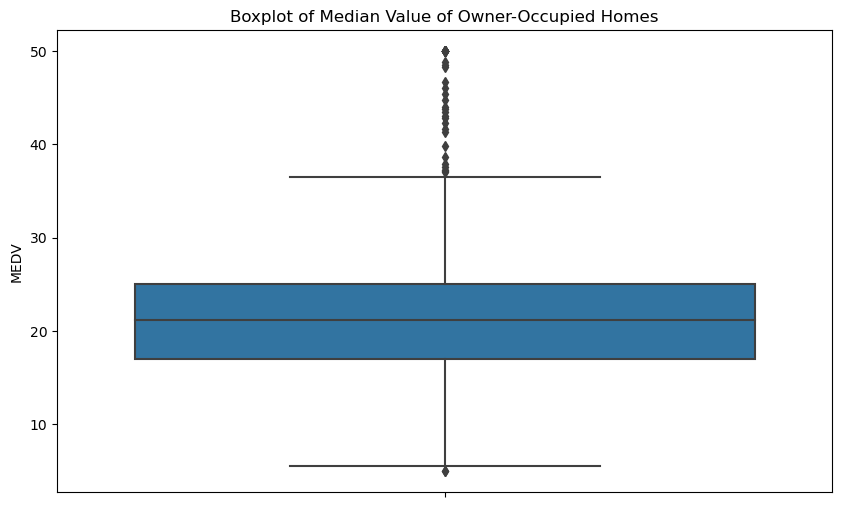

In [20]:
# For the "Median value of owner-occupied homes" provide a boxplot
pyplot.figure(figsize=(10, 6))
sns.boxplot(y=data['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.ylabel('MEDV')
pyplot.show()

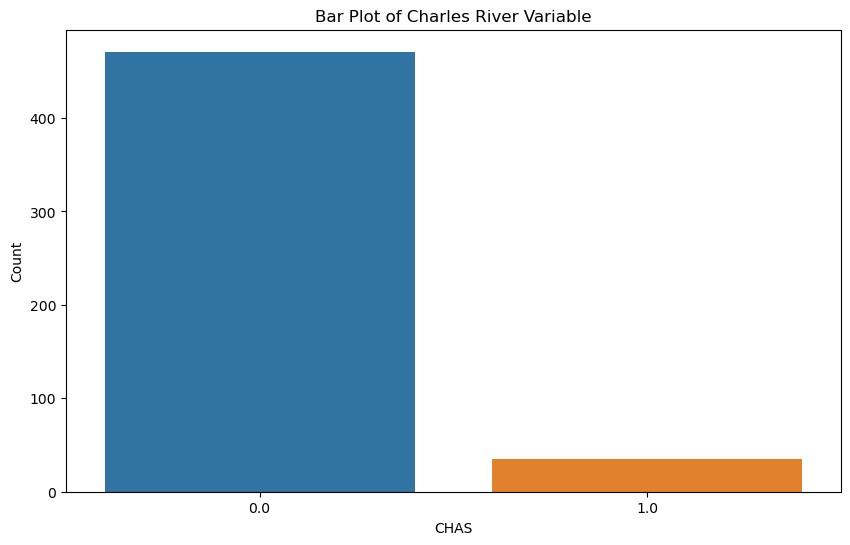

In [21]:
# Provide a bar plot for the Charles river variable
pyplot.figure(figsize=(10, 6))
sns.countplot(x=data['CHAS'])
pyplot.title('Bar Plot of Charles River Variable')
pyplot.xlabel('CHAS')
pyplot.ylabel('Count')
pyplot.show()

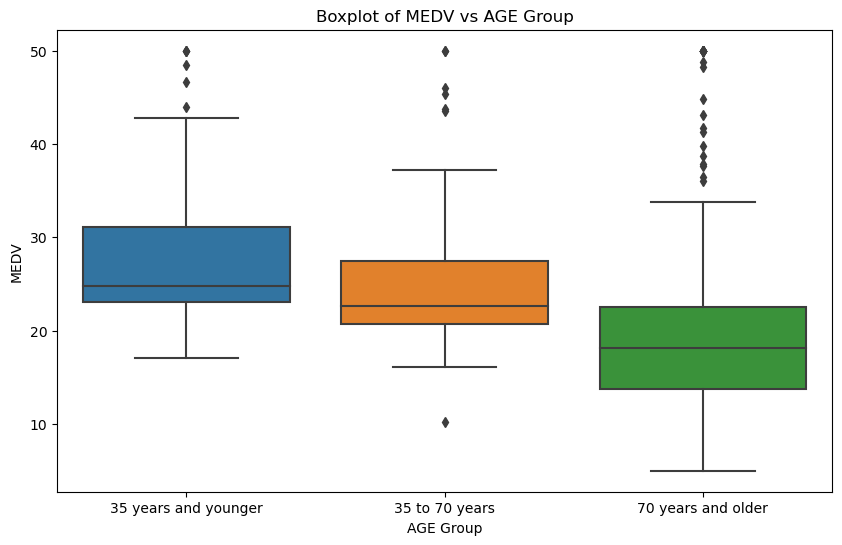

In [22]:
# Discretize the age variable into three groups and provide a boxplot for the MEDV variable vs the AGE variable
data['AGE_group'] = pd.cut(data['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35 to 70 years', '70 years and older'])

pyplot.figure(figsize=(10, 6))
sns.boxplot(x=data['AGE_group'], y=data['MEDV'])
pyplot.title('Boxplot of MEDV vs AGE Group')
pyplot.xlabel('AGE Group')
pyplot.ylabel('MEDV')
pyplot.show()

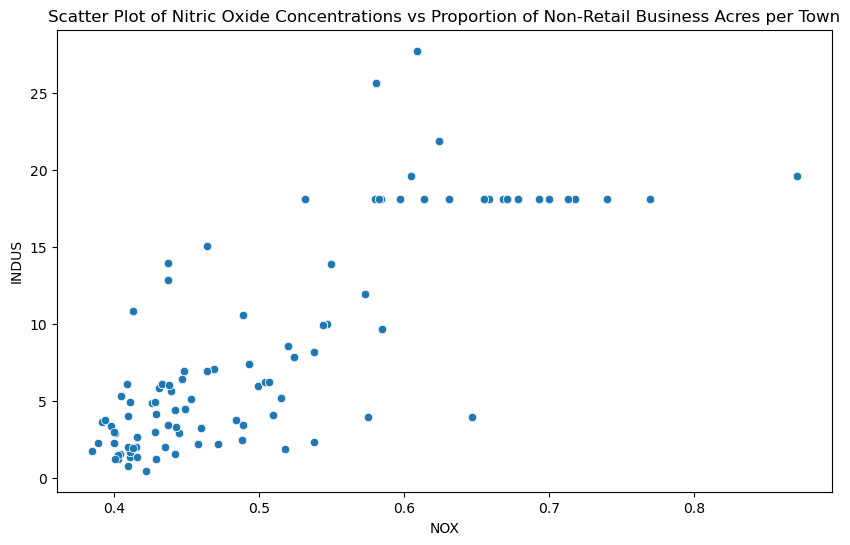

In [23]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x=data['NOX'], y=data['INDUS'])
pyplot.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-Retail Business Acres per Town')
pyplot.xlabel('NOX')
pyplot.ylabel('INDUS')
pyplot.show()

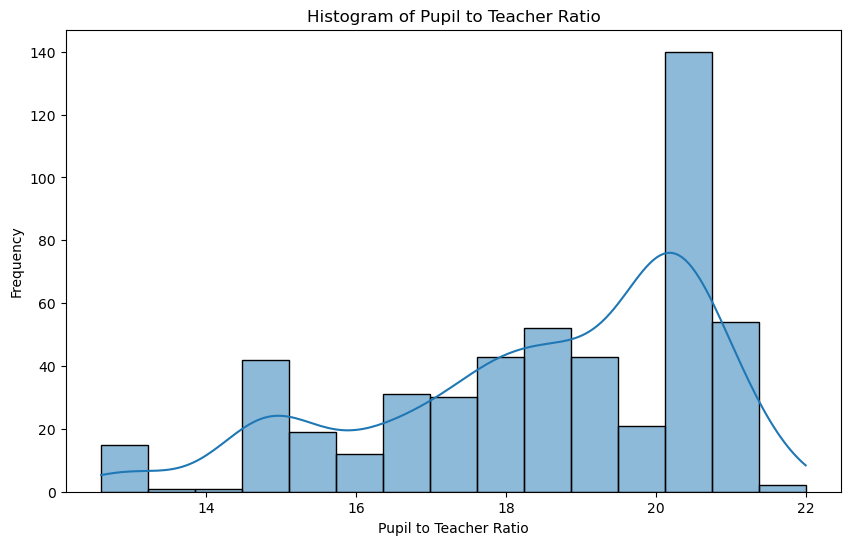

In [24]:
# Create a histogram for the pupil to teacher ratio variable
pyplot.figure(figsize=(10, 6))
sns.histplot(data['PTRATIO'], bins=15, kde=True)
pyplot.title('Histogram of Pupil to Teacher Ratio')
pyplot.xlabel('Pupil to Teacher Ratio')
pyplot.ylabel('Frequency')
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.

In [27]:
# Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not?
# Hypothesis: 
# H0: There is no significant difference in the median value of houses bounded by the Charles river (CHAS=1) and those that are not (CHAS=0).
# H1: There is a significant difference in the median value of houses bounded by the Charles river (CHAS=1) and those that are not (CHAS=0).

chas_0 = data[data['CHAS'] == 0]['MEDV']
chas_1 = data[data['CHAS'] == 1]['MEDV']

t_stat, p_value = stats.ttest_ind(chas_0, chas_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles river.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median value of houses bounded by the Charles river.")

T-statistic: -3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in the median value of houses bounded by the Charles river.


In [28]:
# Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?
# Hypothesis:
# H0: There is no difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE).
# H1: There is a difference in the median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE).

# Discretize AGE into categories
data['AGE_group'] = pd.cut(data['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', '35 to 70 years', '70 years and older'])

# ANOVA test
anova_result = ols('MEDV ~ C(AGE_group)', data=data).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print("\nANOVA result:")
print(anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the median values of houses for different AGE groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the median values of houses for different AGE groups.")




ANOVA result:
                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN
Reject the null hypothesis: There is a significant difference in the median values of houses for different AGE groups.


In [29]:
# Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
# Hypothesis:
# H0: There is no relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).
# H1: There is a relationship between Nitric oxide concentrations (NOX) and proportion of non-retail business acres per town (INDUS).

correlation, p_value = stats.pearsonr(data['NOX'], data['INDUS'])
print(f"\nPearson Correlation: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")




Pearson Correlation: 0.763651446920915, P-value: 7.913361061241167e-98
Reject the null hypothesis: There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [30]:
# Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
# Hypothesis:
# H0: There is no impact of weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).
# H1: There is an impact of weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).

# Regression analysis
X = sm.add_constant(data['DIS'])
model = sm.OLS(data['MEDV'], X).fit()
print("\nRegression analysis result:")
print(model.summary())

if model.pvalues['DIS'] < 0.05:
    print("Reject the null hypothesis: There is a significant impact of weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of weighted distance to the five Boston employment centres on the median value of owner-occupied homes.")


Regression analysis result:
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 21 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        19:22:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901  